<a href="https://colab.research.google.com/github/juliosoterooo/Extracci-n-de-datos/blob/main/Act%203.3%20Valores%20At%C3%ADpicos/Actividad%203.3.2/M%C3%A9xico_act_3_3_valores_at%C3%ADpicos_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Importamos las libreerias pandas, numpy y matplotlib respectivamente
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
cualitativas=pd.read_csv('Cualitativo_Limpio(méxico).csv')
cuantitativas=pd.read_csv('Cuantitativas_Limpio(méxico).csv')

In [46]:
cualitativas.head()

,Unnamed: 0,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,has_availability,instant_bookable
0,0,Marco,2013-01-21,"Mexico City, Mexico",within an hour,within an hour,Roma Norte,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Cuauhtémoc,Entire rental unit,Entire home/apt,t,f
1,1,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,a few days or more,Unknown,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,Entire villa,Entire home/apt,t,f
2,2,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,within an hour,Condesa,"['email', 'phone', 'work_email']",t,t,Unknown,Cuauhtémoc,Entire home,Entire home/apt,t,f
3,3,Martina,2013-01-09,"Mexico City, Mexico",within an hour,within an hour,Unknown,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,Entire serviced apartment,Entire home/apt,t,t
4,4,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,within a day,Hipódromo,"['email', 'phone']",t,t,Unknown,Cuauhtémoc,Entire rental unit,Entire home/apt,t,f


In [47]:
cuantitativas.head()

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,898633,4796027,1.00,0.88,3,6,19.42063,-99.16586,2,...,3,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3,0.41
1,1,35797,153786,0.00,0.90,1,1,19.38283,-99.27178,2,...,0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1,1.70
2,2,44616,196253,1.00,0.92,17,17,19.41162,-99.17794,14,...,0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13,0.42
3,3,913084,4647293,1.00,0.96,1,4,19.43956,-99.17263,4,...,6,4.75,4.83,4.72,4.84,4.93,4.46,4.75,1,1.19
4,4,67703,334451,0.89,0.62,3,4,19.41152,-99.16857,4,...,4,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2,0.32


In [48]:
cualitativas.drop('Unnamed: 0',axis=1,inplace=True)
cuantitativas.drop('Unnamed: 0',axis=1,inplace=True)


Metodo que detecta mayor numero de outliers: Rango intercuartílico y gráficamente se reresenta con caja y bigote

Para poder observar los cambios de mejor forma, se utilizará la columna reviews per month, esto con la finalidad de observar las transformaciones que se le realizan

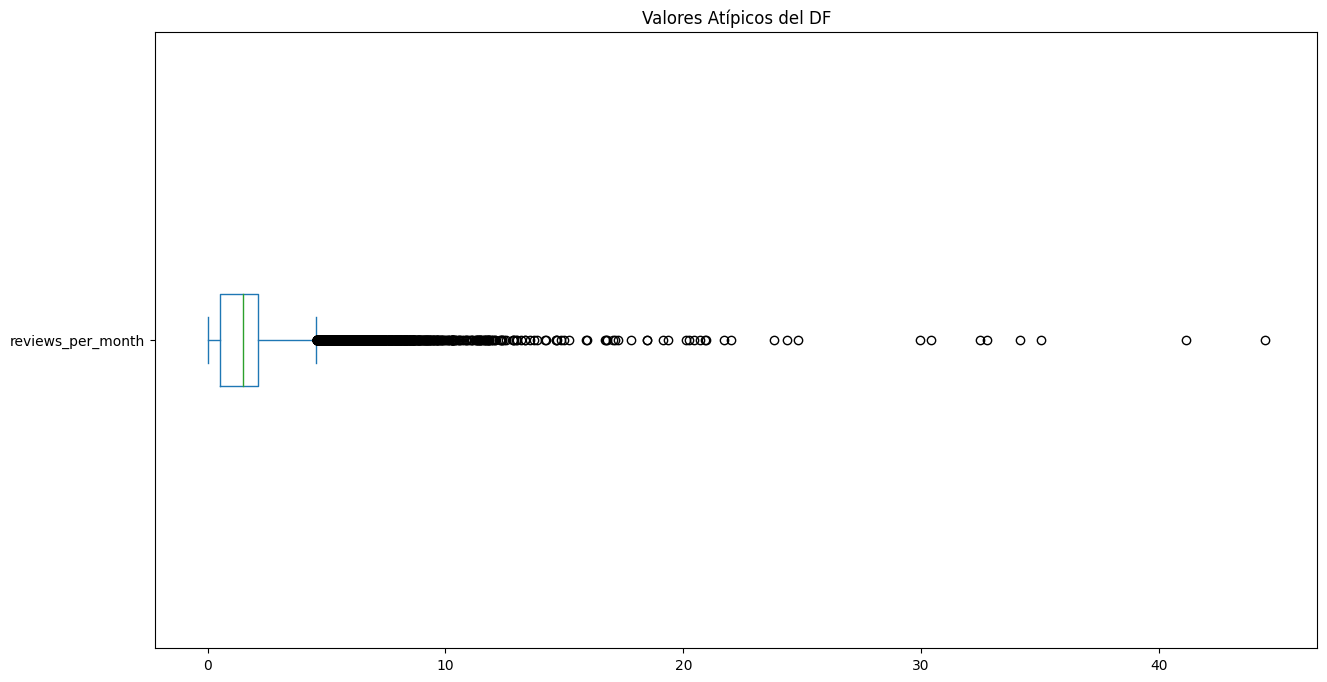

In [49]:
#Realizamos diagrama de caja o bigote de cada columna del DF
fig= plt.figure(figsize=(15 ,8))
cuantitativas['reviews_per_month'].plot(kind='box', vert=False)
plt.title('Valores Atípicos del DF')
plt.show() #Dibujamos el diagrama

# Primer Metodo **Procedimiento "Desviación Estandar" para eliminar outliers en el DF**

In [50]:
#Método aplicando desvest. Encuentro los valores extremos
# 3 desviaciones estandar para la izquierda y derecha para encontrar los límites
y=cuantitativas
Limite_Superior= y.mean()+ 3*y.std()
Limite_Inferior= y.mean()- 3*y.std()
print('-Límite superior permitido\n', Limite_Superior,'\n')
print('-Límite inferior permitido\n', Limite_Inferior)

-Límite superior permitido
 id                                1.903001e+18
host_id                           7.540126e+08
host_response_rate                1.447669e+00
host_acceptance_rate              1.555836e+00
host_listings_count               2.761162e+02
host_total_listings_count         4.885766e+02
latitude                          1.953258e+01
longitude                        -9.906656e+01
accommodates                      1.036711e+01
bathrooms                         4.420438e+00
bedrooms                          5.309822e+00
beds                              6.801953e+00
price                             1.321417e+04
minimum_nights                    7.715870e+01
maximum_nights                    1.839513e+03
maximum_maximum_nights            2.177492e+03
minimum_nights_avg_ntm            7.475091e+01
maximum_nights_avg_ntm            2.168602e+03
availability_30                   5.061659e+01
availability_60                   1.027882e+02
availability_90                 

In [51]:
#Obtenemos los datos y los Outliers se convierten en nulos en el DF
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,898633,4796027,1.00,0.88,3.0,6.0,19.420630,-99.165860,2.0,1.0,...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,35797,153786,NaN,0.90,1.0,1.0,19.382830,NaN,2.0,1.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
2,44616,196253,1.00,0.92,17.0,17.0,19.411620,-99.177940,NaN,NaN,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42
3,913084,4647293,1.00,0.96,1.0,4.0,19.439560,-99.172630,4.0,1.0,...,6.0,4.75,4.83,4.72,4.84,4.93,4.46,4.75,1.0,1.19
4,67703,334451,0.89,0.62,3.0,4.0,19.411520,-99.168570,4.0,1.0,...,4.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,1187191423076770832,19255745,1.00,1.00,13.0,15.0,19.404546,-99.168252,NaN,NaN,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,8.0,1.70
26532,1187248376951514656,7681206,0.97,0.91,33.0,51.0,19.420567,-99.166263,3.0,1.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,11.0,1.70
26533,1187269835146549014,50951150,1.00,1.00,12.0,15.0,19.408648,-99.170992,3.0,1.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
26534,1187283698786191137,147254250,1.00,1.00,3.0,3.0,19.412367,-99.166447,4.0,1.5,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,3.0,1.70


In [52]:
#Corroboramos valores nulos del DF
valores_nulos= data3.isnull().sum()
valores_nulos

,0
id,0
host_id,0
host_response_rate,819
host_acceptance_rate,1102
host_listings_count,791
host_total_listings_count,415
latitude,359
longitude,702
accommodates,500
bathrooms,415


In [53]:
#Reemplazamos valores atípicos (nulos) del DF con "mean"
#Realizamos copia del DF
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,898633,4796027,1.00,0.88,3.0,6.0,19.420630,-99.165860,2.0,1.0,...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,35797,153786,1.00,0.90,1.0,1.0,19.382830,-99.200000,2.0,1.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
2,44616,196253,1.00,0.92,17.0,17.0,19.411620,-99.177940,3.1,1.4,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42
3,913084,4647293,1.00,0.96,1.0,4.0,19.439560,-99.172630,4.0,1.0,...,6.0,4.75,4.83,4.72,4.84,4.93,4.46,4.75,1.0,1.19
4,67703,334451,0.89,0.62,3.0,4.0,19.411520,-99.168570,4.0,1.0,...,4.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,1187191423076770832,19255745,1.00,1.00,13.0,15.0,19.404546,-99.168252,3.1,1.4,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,8.0,1.70
26532,1187248376951514656,7681206,0.97,0.91,33.0,51.0,19.420567,-99.166263,3.0,1.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,11.0,1.70
26533,1187269835146549014,50951150,1.00,1.00,12.0,15.0,19.408648,-99.170992,3.0,1.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
26534,1187283698786191137,147254250,1.00,1.00,3.0,3.0,19.412367,-99.166447,4.0,1.5,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,3.0,1.70


In [54]:
#Corroboramos valores nulos del DF
valores_nulos= data_clean.isnull().sum()
valores_nulos

,0
id,0
host_id,0
host_response_rate,0
host_acceptance_rate,0
host_listings_count,0
host_total_listings_count,0
latitude,0
longitude,0
accommodates,0
bathrooms,0


# Segundo Metodo **Procedimiento "Cuantiles" para eliminar outliers en el DF**



In [56]:
y=cuantitativas

percentiles25=y.quantile(0.25) #Q1
percentiles75=y.quantile(0.75) #Q3
iqr= percentiles75-percentiles25

Limite_Superior_iqr=percentiles75 + 1.5*iqr
Limite_Inferior_iqr=percentiles25- 1.5*iqr
print("Límite superior permitido: \n",Limite_Superior_iqr)
print("\nLímite inferior permitido: \n",Limite_Inferior_iqr)

Límite superior permitido: 
 id                                2.350126e+18
host_id                           8.456103e+08
host_response_rate                1.150000e+00
host_acceptance_rate              1.150000e+00
host_listings_count               3.350000e+01
host_total_listings_count         3.950000e+01
latitude                          1.949363e+01
longitude                        -9.911756e+01
accommodates                      7.000000e+00
bathrooms                         3.500000e+00
bedrooms                          3.500000e+00
beds                              3.500000e+00
price                             2.713000e+03
minimum_nights                    3.500000e+00
maximum_nights                    2.527500e+03
maximum_maximum_nights            2.265000e+03
minimum_nights_avg_ntm            4.500000e+00
maximum_nights_avg_ntm            2.265000e+03
availability_30                   6.450000e+01
availability_60                   1.125000e+02
availability_90                

In [57]:
#Obtenemos datos limpios del DF
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,898633,4796027,1.00,0.88,3.0,6.0,19.420630,-99.165860,2.0,1.0,...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,35797,153786,NaN,0.90,1.0,1.0,19.382830,NaN,2.0,1.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
2,44616,196253,1.00,0.92,17.0,17.0,19.411620,-99.177940,NaN,NaN,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42
3,913084,4647293,1.00,0.96,1.0,4.0,19.439560,-99.172630,4.0,1.0,...,6.0,4.75,4.83,4.72,4.84,4.93,NaN,4.75,1.0,1.19
4,67703,334451,0.89,NaN,3.0,4.0,19.411520,-99.168570,4.0,1.0,...,4.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,1187191423076770832,19255745,1.00,1.00,13.0,15.0,19.404546,-99.168252,NaN,NaN,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,8.0,1.70
26532,1187248376951514656,7681206,0.97,0.91,33.0,NaN,19.420567,-99.166263,3.0,1.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,11.0,1.70
26533,1187269835146549014,50951150,1.00,1.00,12.0,15.0,19.408648,-99.170992,3.0,1.0,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
26534,1187283698786191137,147254250,1.00,1.00,3.0,3.0,19.412367,-99.166447,4.0,1.5,...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,3.0,1.70


In [58]:
#Corroboramos valores nulos del DF Limpio
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

,0
id,0
host_id,0
host_response_rate,1411
host_acceptance_rate,2853
host_listings_count,3537
host_total_listings_count,3824
latitude,1773
longitude,2814
accommodates,1328
bathrooms,641


In [59]:
#Remplazamos valores atípicos (nulos) con del DF con "mean"
#Realizamos una copia del DF
data_4_iqr= data3_iqr.copy()
data_4_iqr=data_4_iqr.fillna(round(data3_iqr.mean(),1))

# Comparación de diagramas de caja

Método DesVest

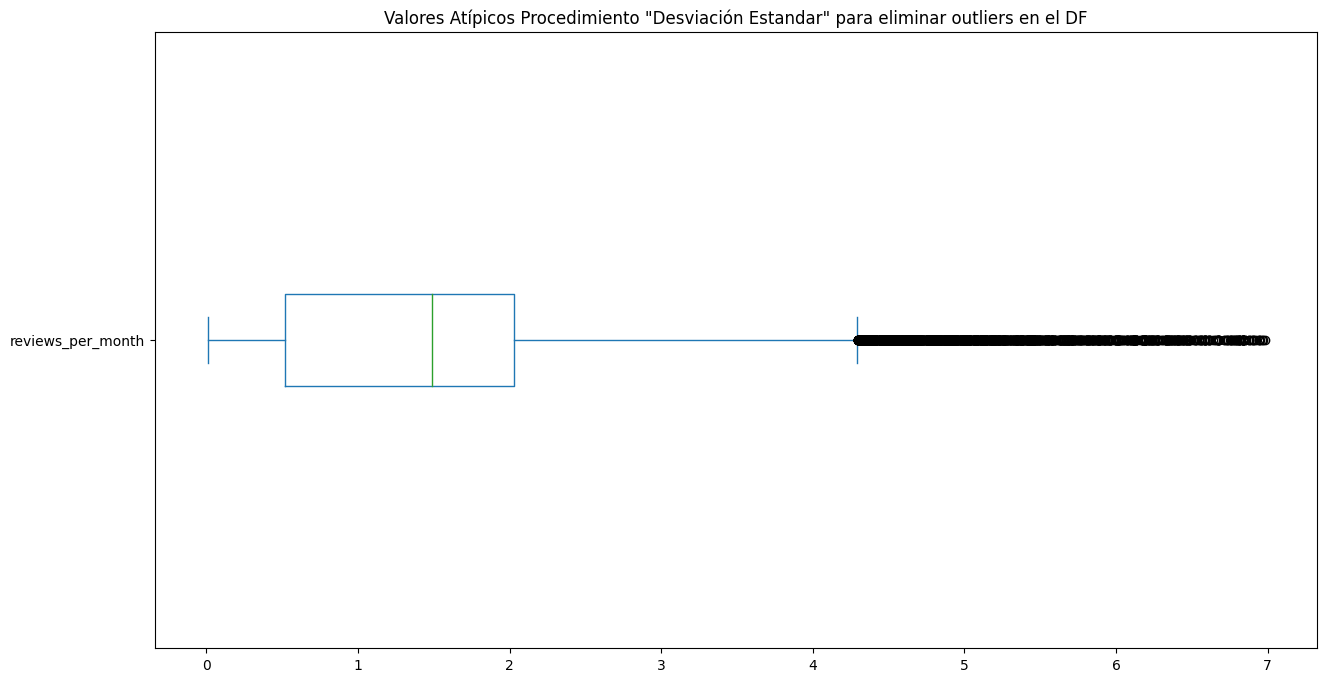

In [60]:
#Realizamos diagrama de caja o bigote de cada columna del DF
fig= plt.figure(figsize=(15 ,8))
data_clean['reviews_per_month'].plot(kind='box', vert=False)
plt.title('Valores Atípicos Procedimiento "Desviación Estandar" para eliminar outliers en el DF')
plt.show() #Dibujamos el diagrama

Método Intercuartil

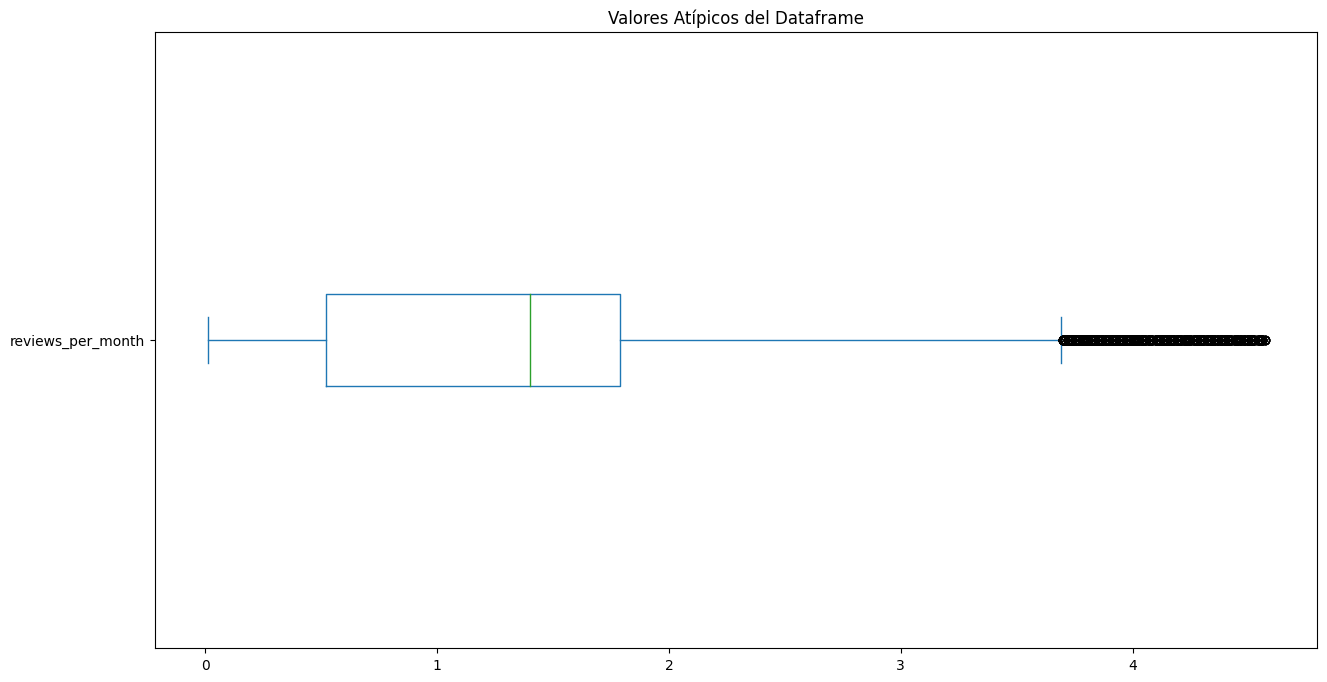

In [61]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
data_4_iqr['reviews_per_month'].plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

# Concatenamos DF´s

In [62]:
#Unimos el DF cuantitativo limpio con el DF cualitativo, iqr

Datos_Limpios_iqr=pd.concat([cualitativas,data_4_iqr], axis=1)
Datos_Limpios_iqr.head()

,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,Marco,2013-01-21,"Mexico City, Mexico",within an hour,within an hour,Roma Norte,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,a few days or more,Unknown,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
2,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,within an hour,Condesa,"['email', 'phone', 'work_email']",t,t,Unknown,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42
3,Martina,2013-01-09,"Mexico City, Mexico",within an hour,within an hour,Unknown,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",...,6.0,4.75,4.83,4.72,4.84,4.93,4.90,4.75,1.0,1.19
4,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,within a day,Hipódromo,"['email', 'phone']",t,t,Unknown,...,4.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.32


In [63]:
#Unimos el DF cuantitativo limpio con el DF cualitativo, DesVest

Datos_Limpios_DesVest=pd.concat([cualitativas,data_clean],axis=1)
Datos_Limpios_DesVest.head()

,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,...,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,Marco,2013-01-21,"Mexico City, Mexico",within an hour,within an hour,Roma Norte,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",...,3.0,4.95,4.93,4.95,4.93,4.96,4.93,4.91,3.0,0.41
1,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,a few days or more,Unknown,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",...,0.0,4.80,4.80,4.80,4.80,4.80,4.80,4.70,1.0,1.70
2,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,within an hour,Condesa,"['email', 'phone', 'work_email']",t,t,Unknown,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,13.0,0.42
3,Martina,2013-01-09,"Mexico City, Mexico",within an hour,within an hour,Unknown,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",...,6.0,4.75,4.83,4.72,4.84,4.93,4.46,4.75,1.0,1.19
4,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,within a day,Hipódromo,"['email', 'phone']",t,t,Unknown,...,4.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.32


In [64]:
Datos_Limpios_DesVest.to_csv('Datos_Limpios_DesVest(méxico).csv')

In [65]:
Datos_Limpios_iqr.to_csv('Datos_Limpios_iqr(méxico).csv')